In [2]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

In [3]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [15]:
ticker=['BBVA.MX']
start,end='2014-01-01','2019-02-23'
closes=get_closes(ticker,start,end,freq='d')

In [6]:
ret=closes.pct_change().dropna()

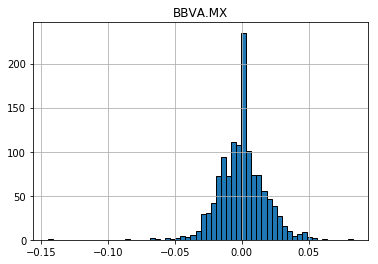

In [7]:
plt.title('BBVA.MX')
plt.hist(ret['BBVA.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

In [8]:
a2014=ret.iloc[0:250,]
a2015=ret.iloc[250:501,]
a2016=ret.iloc[501:753,]
a2017=ret.iloc[753:1004,]
a2018=ret.iloc[1004:1255,]

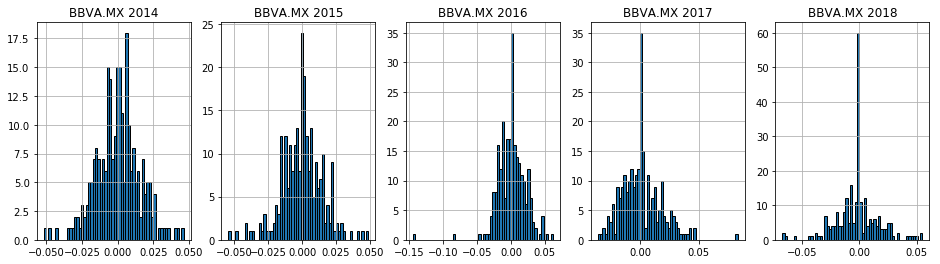

In [9]:
plt.figure(figsize=(16,4))
plt.subplot(151)
plt.title('BBVA.MX 2014')
plt.hist(a2014['BBVA.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(152)
plt.title('BBVA.MX 2015')
plt.hist(a2015['BBVA.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(153)
plt.title('BBVA.MX 2016')
plt.hist(a2016['BBVA.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(154)
plt.title('BBVA.MX 2017')
plt.hist(a2017['BBVA.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(155)
plt.title('BBVA.MX 2018')
plt.hist(a2018['BBVA.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

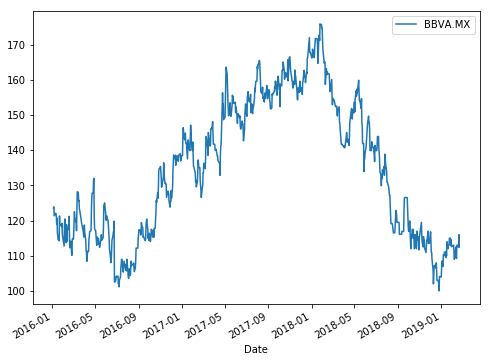

In [10]:
p1618=closes.iloc[502:1293,]
p1618.plot(figsize=(8,6))

### Cambios en los precios


<div class=text-justify> Al inicio de la gráfcia los precios van a la baja, con bastante volatilidad, al final del 2016 inicia una tendencia positiva que llega hasta inicios del 2018, alcanzando un precio de 176 aproximadamente. Después de ste pico, inicia un periodo con tendencia negativa hasta inicios del 2019, donde parece que rompe el suelo establecido en 2016.  </div>

In [18]:
ret16=p1618.pct_change().dropna()
ret_sum=pd.DataFrame(index=['Rend diario','Rend anual','Vol diaria','Vol anual'],columns=['2016','2017','2018','Todo'])
list=[a2016,a2017,a2018,ret16]
for x in range (0,4):
    ret_sum.loc['Rend diario'][ret_sum.columns[x]]=list[x]['BBVA.MX'].mean()
    ret_sum.loc['Rend anual'][ret_sum.columns[x]]=list[x]['BBVA.MX'].mean()*252
    ret_sum.loc['Vol diaria'][ret_sum.columns[x]]=list[x]['BBVA.MX'].std()
    ret_sum.loc['Vol anual'][ret_sum.columns[x]]=list[x]['BBVA.MX'].std()*np.sqrt(252)
ret_sum

,2016,2017,2018,Todo
Rend diario,0.000598039,0.000902917,-0.00173258,5.69435e-05
Rend anual,0.150706,0.227535,-0.436611,0.0143498
Vol diaria,0.020992,0.0168157,0.0183677,0.0187111
Vol anual,0.333238,0.266941,0.291578,0.297029


### Discusión datos tabla


<div class=text-justify> Todo 2016 y 2017 muestra rendimientos positivos tanto anuales como diarios, con una volatilidad de .26 a .33. 2018 muestra un rendimeinto negativo tanto anual como diario, en general, el rensimiento anual logra ser positivo pero por muy poco.  </div>

In [19]:
ret18=ret.iloc[1004:1293,]
ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ticker)
ret_sum.loc['Mean']=ret18.mean()
ret_sum.loc['Volatility']=ret18.std()

In [20]:
n=1000
for x in range (0,3):
    mu= ret_sum['BBVA.MX']['Mean']
    sigma= ret_sum['BBVA.MX']['Volatility']
    s0=112.47
    listaepsilon = [np.random.randn() for _ in range(n)]
    epsilons = np.asarray(listaepsilon)
    epsilon = pd.DataFrame(columns = ['Epsilon', 'st1','st10','st30','st252'])
    epsilon['Epsilon']= epsilons
    epsilon['st1']= s0*np.exp((mu*.5*sigma**2)*1+sigma*np.sqrt(1)*epsilons)
    epsilon['st10']= s0*np.exp((mu*.5*sigma**2)*10+sigma*np.sqrt(10)*epsilons)
    epsilon['st30']= s0*np.exp((mu*.5*sigma**2)*30+sigma*np.sqrt(30)*epsilons)
    epsilon['st252']= s0*np.exp((mu*.5*sigma**2)*252+sigma*np.sqrt(252)*epsilons)
    st=pd.DataFrame(index=['Mean','liminf','limsup'],columns=epsilon.columns)
    st.loc['Mean']=epsilon.mean()
    st.loc['liminf']=epsilon.min()
    st.loc['limsup']=epsilon.max()
    st=st.drop('Epsilon',1)
    print(st)
    n=n*10

            st1     st10     st30    st252
Mean    112.408   112.39  112.545   115.48
liminf  106.052  93.3975  81.5186  44.2488
limsup  118.243  131.758  147.943  248.936
            st1     st10     st30    st252
Mean     112.51  112.722   113.14  117.533
liminf  105.175  90.9772  77.8945  38.7847
limsup   120.52   139.95  164.237  336.972
            st1     st10     st30    st252
Mean    112.489  112.658   113.03  117.228
liminf  104.322  88.6662  74.4993  34.0852
limsup  121.723  144.416  173.421  394.534


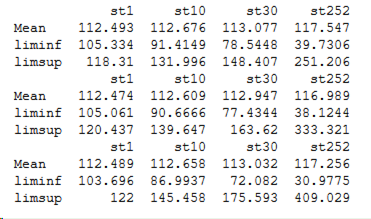